
## Demonstration of the Gradient descent method for a linear regression model with one tunable parameter 

**Goal:** In this notebook you will see how the MSE loss of a simple linear regression depends on the value of the slope parameter (keeping the intercept to the optimal value). You will see that the optimal slope value can be found via gradient descent (GD) when computing the gradient of the loss w.r.t the slope via the gradient formula und updating the slope value via the update formula.

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. Some positions are marked as exercises, where you find some more specific tasks.

**Dataset:** You work with the systolic blood pressure and age data of 33 American women, which is in the upper part of the notebook generated and visualized.  

**Content:**
 
* fit a linear model via the sklearn machine learning library of python to get the optimal fitted values of the intercept and slope as reference. 

* use some initial values for the intercept and slope and compute the MSE loss of the corresponding regression model. 

* use the formula for the optimal intercept and slope values and compute again the corresponding mse loss

* fix the intercept paramber to the optimal value and plot the loss versus the tunable slope parameter.

* initialize the slope value with -0.5

* compute the gradient of the loss w.r.t. the slope parameter via the gradient formula and update the the slope value via the update formula

* iterate over the former step and check the current values of the estimated model parameter and the loss after each step. Visualize the development of the slope value in the loss-vs-slope plot.

* verify that the estimated slope value converges to the value which you got from the sklearn fit

* Play around with the learning rate eta and observe the impact on the update behaviour

##         “Hello world” in curve fitting


#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

#### Blood Pressure data 
Here we read in the systolic blood pressure and the age of the 33 American women in our dataset.

In [3]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32) 

Let plot the data in a scatter plot and use the sklearn library to fit the linear model to determine and the opimal values for the slope a and the intercept b. 

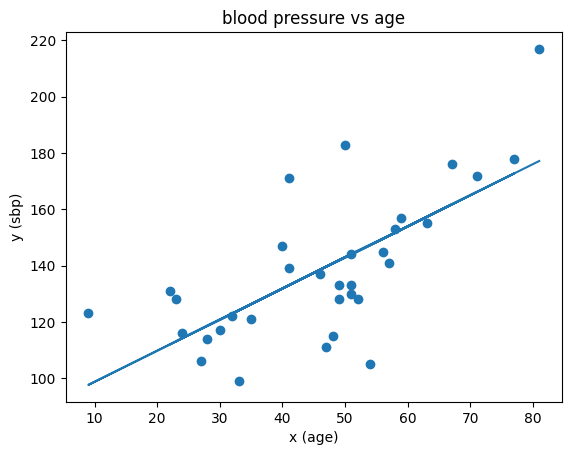

intercept =  87.67143 solpe =  1.1050216


In [4]:
plt.scatter(x=x, y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y) # Fitting the linear regression
predictions = model.predict(x.reshape((len(x),1))) 
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"slope = ", res.coef_[0])

####  MSE for the first 5 data points

In the next cell for calculate and print the mean squared error (MSE) loss for the first 5 data points with our starting values a=1 and b=100. Compare the result with the book.

In [5]:
x_sub = x[0:5] #extract the first 5 data points of x 
y_sub = y[0:5] #extract the first 5 data points of y
a = 1                            
b = 100                          
y_hat = a*x_sub + b                  
r = (y_sub - y_hat)                  
MSE = np.sum(np.square(r)) / len(y_sub)     
MSE

317.2

####  MSE for all data points

In the next cell for calculate and print the mean squared error (MSE) loss with our starting values a=1 and b=100.

#### Listing 3.1  Calculation of the MSE in Python / numpy 


In [6]:
a = 1                            
b = 100                          
y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(np.square(r)) / len(y)     
MSE

408.1515151515151

#### Minimize the MSE by randomly trying different values for the slope a and the intercept
<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />
*Exercise 1: Try to find better values for a and b (by randolmly increasing/decreasing a and/or b), yielding a lower MSE. 
Remember that for a=1 and b=100 the MSE is 408.15*



In [28]:
a = 0.84                            # try a diffrent value for a here that minimizes the MSE
b = 100                            # try a diffrent value for b here that minimizes the MSE

y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(np.square(r)) / len(y)     
MSE

367.85555752840907

#### Return to the book
<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/Page_turn_icon_A.png" width="120" align="left" />  
Return to the book to learn about the closed form solution and the gradient descent method.

#### Using the closed form solution to minimize the MSE with a and b

Now we determine the optimal values for the slope a and intercept b with the closed solution formula and inspect the achived values for the parameters and the MSE. If you compare the results with the ones form the skleran linear regression fit, you see that they are equal.   

#### Closed form solution:
$$\hat{\alpha} = \frac{\sum\limits_{i=1}^{n}(x_i – \bar{x}) (y_i – \bar{y})} {\sum\limits_{i=1}^{n}(x_i – \bar{x})^2}$$  
$$\hat{\beta} = \bar{y} – \hat{\alpha} \bar{x} $$


We get the same values as from the sklearn fit.



In [29]:
a_hat = np.sum((x-np.mean(x))*((y-np.mean(y)))) / (np.sum(np.square(x-np.mean(x))))
b_hat = np.mean(y) - a_hat*np.mean(x)

a = a_hat                         
b = b_hat                       
y_hat = a*x + b                  
r = (y - y_hat)                  
MSE = np.sum(r**2) / len(y)      

print("slope : a_hat = " ,a_hat)
print("intercept : b_hat = " ,b_hat)
print("minimal MSE = ", MSE)

slope : a_hat =  1.1050217
intercept : b_hat =  87.67143
minimal MSE =  349.20090553977275


##        Gradient descent method with one tunable parameter
Now we use the gradient descent method in 1 dimension to find the optinal value for the slope a. For this we fix the intercept to the optimal value b=87.6 and calculate the MSE loss for diffrent values of the slope a. Then we plot the loss as a function of the slope.

In [30]:
b = 87.6
a = np.arange(-1, 2, 0.02)
MSE=np.zeros(len(a))
for i in range(0,len(a)):
  MSE[i] =  np.mean(np.square(y-(a[i] * x + b)))

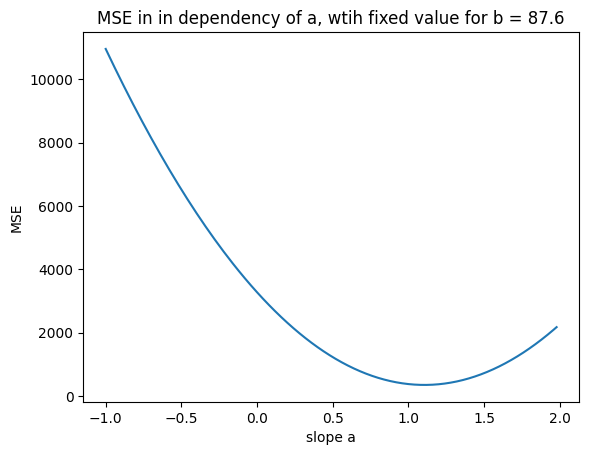

In [31]:
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.show()

#### Change the learning rate and study how the slope a gets updated
Let's use the gradient descent method in 1 dimension to find the a better value for a. We start with a = -0.5 and a learning rate eta = 0.0003 and make 5 update steps. 


<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
Exercise 2 : Run the two cells below and then try to find a better learning rate eta that reaches the optimal value for a faster (less update steps). Try larger and smaller values. What do you observe?


In [42]:
a_ = -0.5
a_history = -0.5
eta = 0.00019
for i in range(0,5):
  grad_a = -2/len(y)*np.sum((y -a_ * x - b) *x) 
  a_ = a_ - eta*grad_a
  a_history =np.append(a_history,a_) 
print(a_history)

[-0.5         0.96052199  1.09315152  1.10519552  1.10628929  1.10638863]


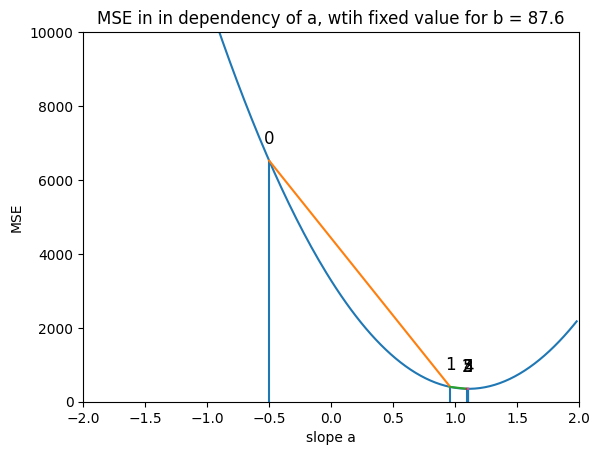

In [43]:

# Visualization of the learning process
plt.plot(a,MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.ylim((0,10000))
plt.xlim((-2,2))

for i in range(0,len(a_history)):
  plt.vlines(x=a_history[i],ymin=0,ymax= np.mean(np.square(y-(a_history[i] * x + b))))
  plt.text(x=a_history[i],y= np.mean(np.square(y-(a_history[i] * x + b)))+600,s= i,horizontalalignment='center',verticalalignment='center',fontsize=12)
for i in range(0,len(a_history)-1):
  plt.plot([a_history[i], a_history[i+1]],[np.mean(np.square(y-(a_history[i] * x + b))), np.mean(np.square(y-(a_history[i+1] * x + b)))])
plt.show()